<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/hdbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 30.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp39-cp39-linux_x86_64.whl size=3580439 sha256=8370c6a484a9e041c5f7b65d4001e376f8a7187fa00dba6e3d2b5d2da57e26f3
  Stored in directory: /root/.cache/pip/wheels/05/6f/88/1a4c04276b98306f00217a1e300e6ba0252c6aa4f7616067ae
Successfully built hdbscan


In [48]:
from sklearn.datasets import make_blobs
import hdbscan
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [20]:
blobs, labels = make_blobs(n_samples=2000, n_features=10)
clusterer = hdbscan.HDBSCAN()
clusterer.fit(blobs)
clusterer.labels_

array([2, 1, 2, ..., 2, 0, 1])

In [14]:
clusterer.probabilities_

array([0.70128553, 0.80100908, 0.81021554, ..., 0.80448107, 0.78816509,
       0.68234189])

<Axes: ylabel='$\\lambda$ value'>

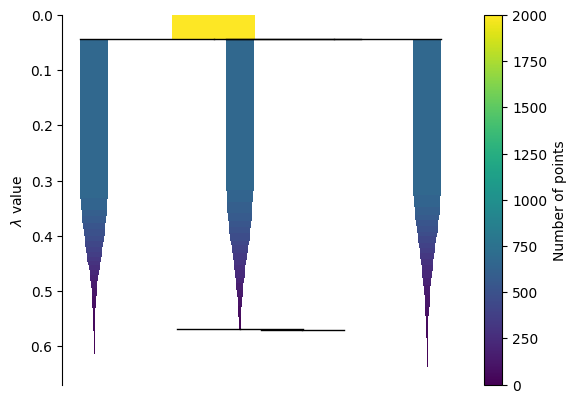

In [21]:
clusterer.condensed_tree_
clusterer.condensed_tree_.plot()

<Axes: ylabel='$\\lambda$ value'>

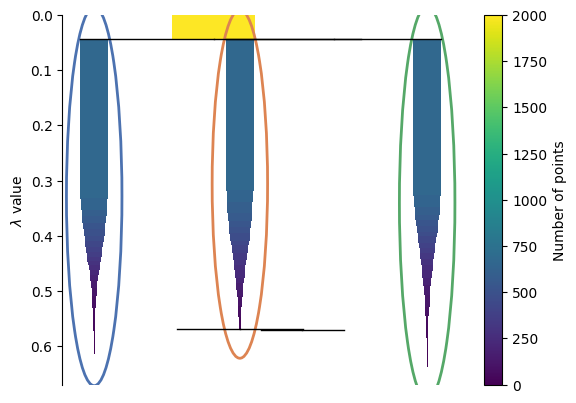

In [22]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))

In [23]:
clusterer = hdbscan.HDBSCAN(metric='manhattan')
clusterer.fit(blobs)
clusterer.labels_

array([2, 1, 2, ..., 2, 0, 1])

<Axes: ylabel='$\\lambda$ value'>

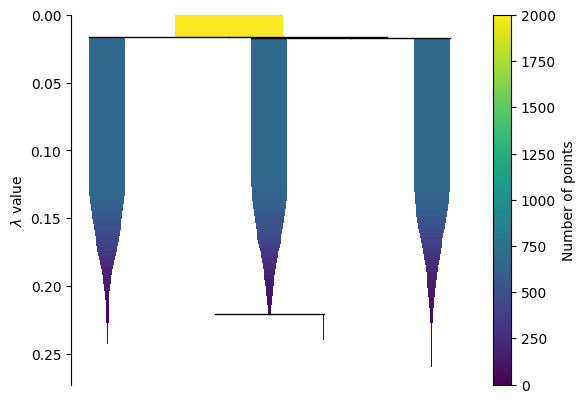

In [24]:
clusterer.condensed_tree_
clusterer.condensed_tree_.plot()

<Axes: ylabel='$\\lambda$ value'>

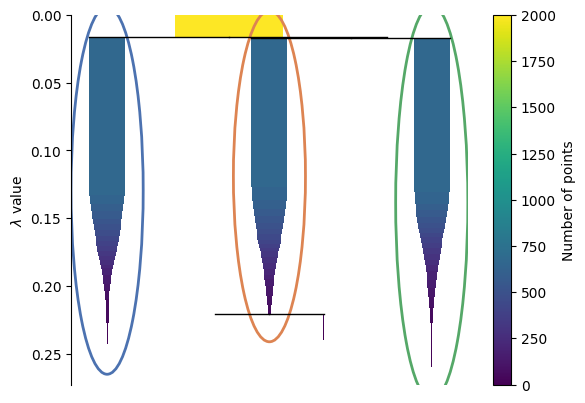

In [25]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))

In [27]:
g = clusterer.condensed_tree_.to_networkx()
g.number_of_nodes()

2007

In [28]:
clusterer.condensed_tree_.to_pandas().head()

,parent,child,lambda_val,child_size
0,2000,2001,0.016491,667
1,2000,2002,0.016491,1333
2,2001,73,0.099937,1
3,2002,2003,0.017273,666
4,2002,2004,0.017273,667


<Axes: ylabel='distance'>

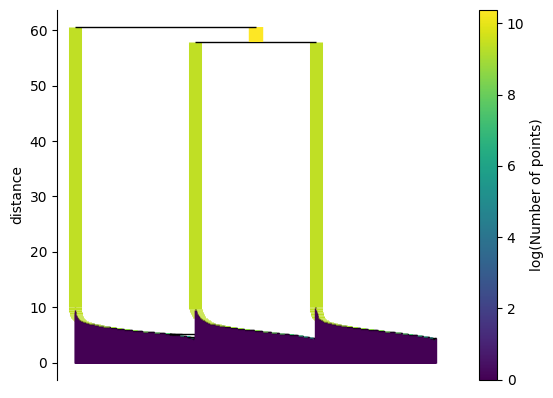

In [29]:
clusterer.single_linkage_tree_.plot()

In [9]:
hdbscan.dist_metrics.METRIC_MAPPING

{'euclidean': hdbscan.dist_metrics.EuclideanDistance,
 'l2': hdbscan.dist_metrics.EuclideanDistance,
 'minkowski': hdbscan.dist_metrics.MinkowskiDistance,
 'p': hdbscan.dist_metrics.MinkowskiDistance,
 'manhattan': hdbscan.dist_metrics.ManhattanDistance,
 'cityblock': hdbscan.dist_metrics.ManhattanDistance,
 'l1': hdbscan.dist_metrics.ManhattanDistance,
 'chebyshev': hdbscan.dist_metrics.ChebyshevDistance,
 'infinity': hdbscan.dist_metrics.ChebyshevDistance,
 'seuclidean': hdbscan.dist_metrics.SEuclideanDistance,
 'mahalanobis': hdbscan.dist_metrics.MahalanobisDistance,
 'wminkowski': hdbscan.dist_metrics.WMinkowskiDistance,
 'hamming': hdbscan.dist_metrics.HammingDistance,
 'canberra': hdbscan.dist_metrics.CanberraDistance,
 'braycurtis': hdbscan.dist_metrics.BrayCurtisDistance,
 'matching': hdbscan.dist_metrics.MatchingDistance,
 'jaccard': hdbscan.dist_metrics.JaccardDistance,
 'dice': hdbscan.dist_metrics.DiceDistance,
 'kulsinski': hdbscan.dist_metrics.KulsinskiDistance,
 'rogerst

In [11]:
distance_matrix = pairwise_distances(blobs)
clusterer = hdbscan.HDBSCAN(metric='precomputed')
clusterer.fit(distance_matrix)
clusterer.labels_

array([1, 1, 0, ..., 1, 2, 2])

In [41]:
digits = load_digits()
data = digits.data
projection = TSNE().fit_transform(data)

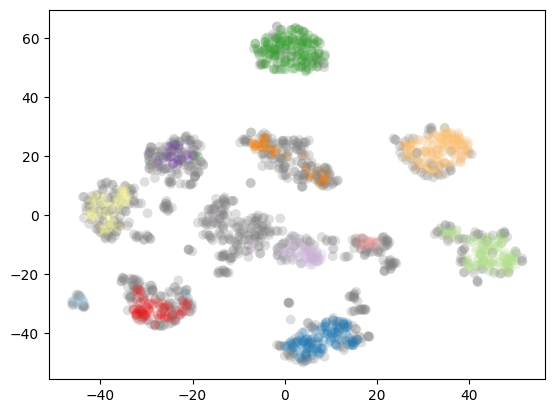

In [40]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

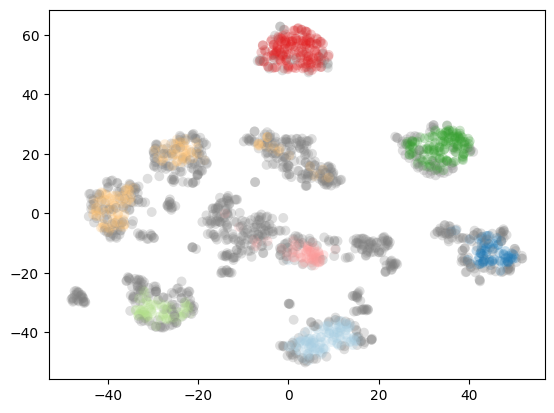

In [42]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=30).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

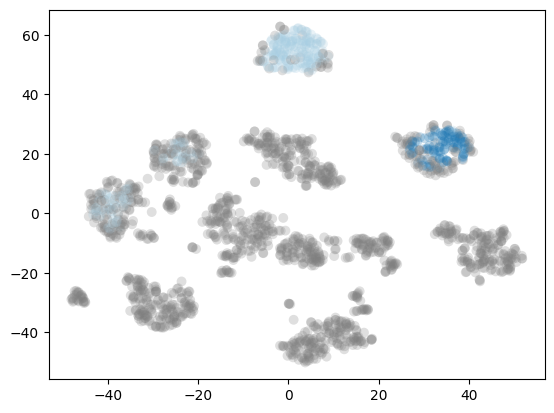

In [43]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=60).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [46]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data)
clusterer.outlier_scores_

array([0.0520059 , 0.29015779, 0.06436271, ..., 0.01515786, 0.02578947,
       0.05538884])

<ipython-input-49-27e9a6db2560>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True)


<Axes: ylabel='Density'>

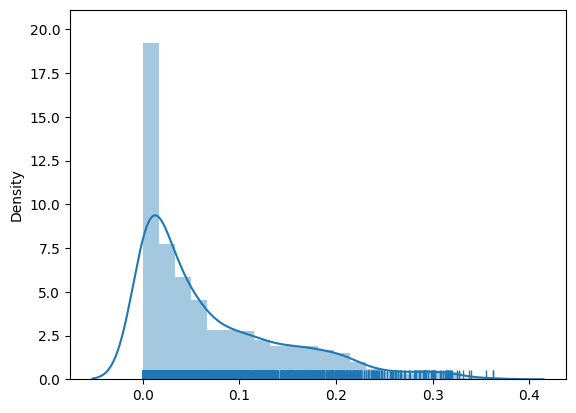

In [49]:
sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True)